# Implementing an Autoencoder

In [1]:
import torch
from torchvision import datasets
from torchvision import transforms

## Loading the data

In [2]:
# Initialize PyTorch Tensor
tensor_txfm = transforms.ToTensor()

# Ge tthe MNIST Dataset
df = datasets.MNIST(root =  "./data",
                    train = True,
                    download = True,
                    transform = tensor_txfm)

load = torch.utils.data.DataLoader(dataset = df,
                                   batch_size = 32,
                                   shuffle = True)

34.4%

100.0%


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100.0%


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




33.8%

100.0%


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100.0%


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
class autoEncoder(torch.nn.Module):
    def __init__(self):
        super().__init__()
        
        # Build a linear encoder
        # Layer followed by ReLU function
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(28 * 28, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 18),
            torch.nn.ReLU(),
            torch.nn.Linear(18, 9)
        )
        
        # Build a linear decoder
        # Essentially the opposite of the encoder
        # Applies sigmoid function which outputs a value between 0 and 1
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(9, 18),
            torch.nn.ReLU(),
            torch.nn.Linear(18, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 28 * 28),
            torch.nn.Sigmoid()
        )
    
    # Encode and decode x
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return(decoded)

## Initialize Model

In [4]:
# Init
model = autoEncoder()

# Loss function (using MSE)
loss_func = torch.nn.MSELoss()

# Use Adam optimizer to update weights
opt = torch.optim.Adam(model.parameters(), 
                       lr = 1e-1,
                       weight_decay = 1e-8)

## Create Output from Model

In [12]:
# Initialize variables
epochs = 20
outputs = []
losses = []

for ep in range(epochs):
    for (image, _) in load:
        
        # Reshape image
        image = image.reshape(-1, 28*28)
        
        # Output of autoencoder
        reconstructed = model(image)
        
        # Calculate loss function
        loss = loss_func(reconstructed, image)
        losses.append(loss)
        
        # Gradient set to zero for each run, recomputed, then stepped
        opt.zero_grad()
        loss.backward()
        opt.step()
    
    # Store outputs 
    outputs.append((epochs, image, reconstructed.detach().numpy()))

## Plot error from each iteration

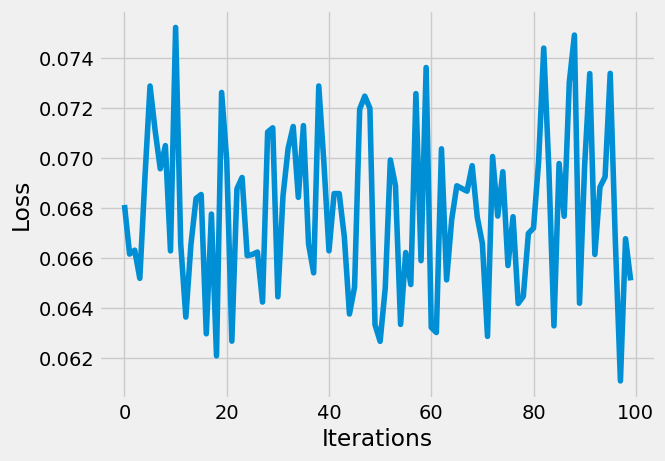

In [22]:
import matplotlib.pyplot as plt

# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Detach data from tensor
loss_plot = (t.detach().numpy() for t in losses[-100:])
loss_plot = list(loss_plot)

# Plotting the last 100 values
plt.plot(loss_plot)

## Plot autoencoder results

In [35]:
print(image.shape)
print(reconstructed.shape)

torch.Size([32, 784])
torch.Size([32, 784])


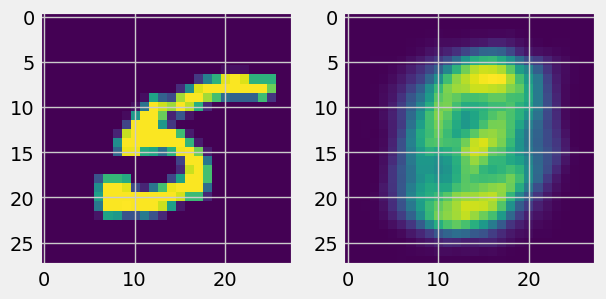

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2)

for idx, im in enumerate(image):
    im = im.reshape(-1, 28, 28)
    ax1.imshow(im[0].detach().numpy())

for idx, im in enumerate(reconstructed):
    im = im.reshape(-1, 28, 28)
    ax2.imshow(im[0].detach().numpy())